In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = Path().cwd().parent / "src/ml_project/assets/raw/heart_cleveland_upload.csv"

In [4]:
df = pd.read_csv(filepath)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Data info

In [21]:
print(f"Class balance: {df.condition.mean():.3f}")

Class balance: 0.461


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Features

Let's assume that a feature is categorical if there are fewer than 5 distinct values in a column.
(from kaggle description)

In [59]:
cat = []
for col in df.columns:
    if col == "condition":
        continue
    uniqs = df[col].unique()
    num_uni = len(uniqs)
    print(f"{col}: {num_uni} unique numbers")
    if num_uni < 5:
        print(uniqs)
        cat.append(col)

age: 41 unique numbers
sex: 2 unique numbers
[1 0]
cp: 4 unique numbers
[0 1 2 3]
trestbps: 50 unique numbers
chol: 152 unique numbers
fbs: 2 unique numbers
[1 0]
restecg: 3 unique numbers
[2 0 1]
thalach: 91 unique numbers
exang: 2 unique numbers
[0 1]
oldpeak: 40 unique numbers
slope: 3 unique numbers
[1 0 2]
ca: 4 unique numbers
[1 2 0 3]
thal: 3 unique numbers
[0 2 1]


In [60]:
print(f"cat feats: {', '.join(cat)}")

cat feats: sex, cp, fbs, restecg, exang, slope, ca, thal


# Statistics

## Histograms

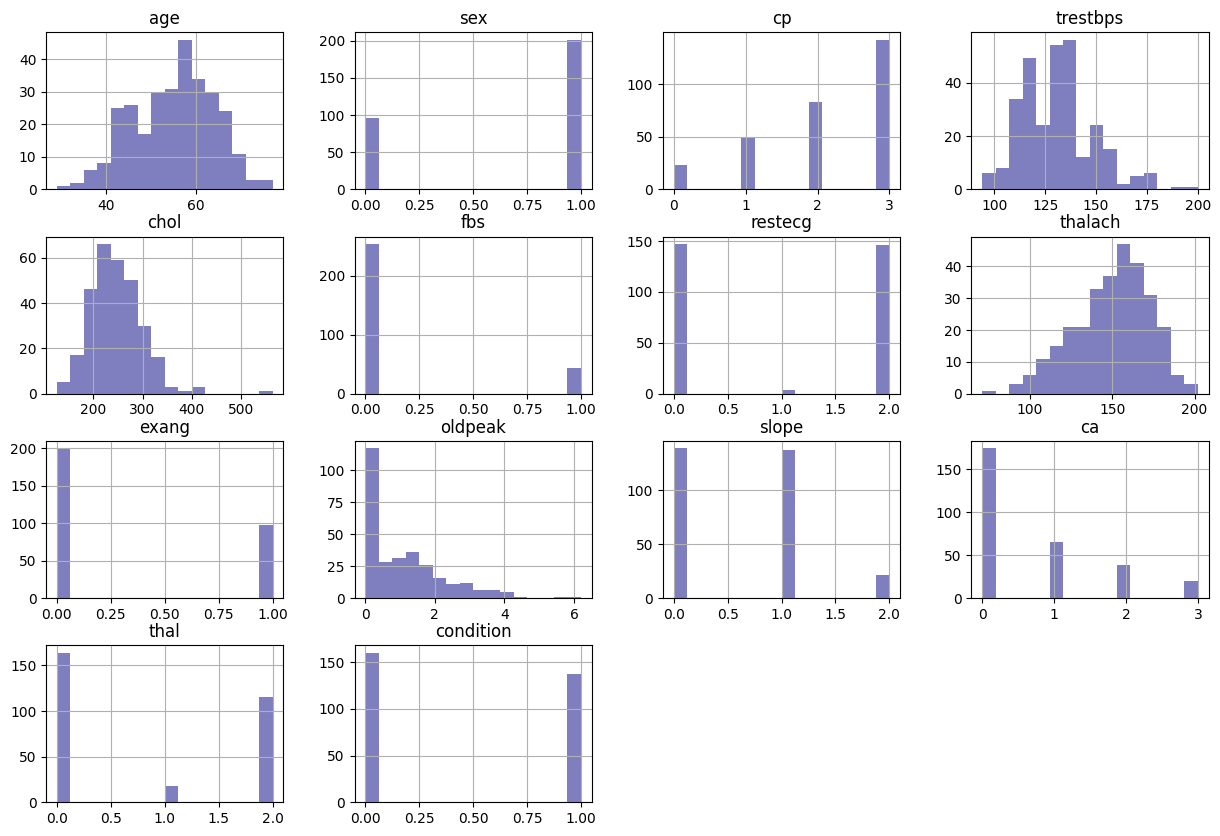

In [57]:
df.hist(bins=16,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

## BoxPlots

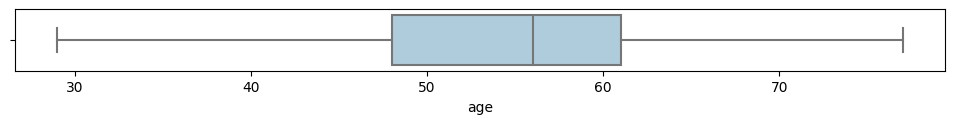

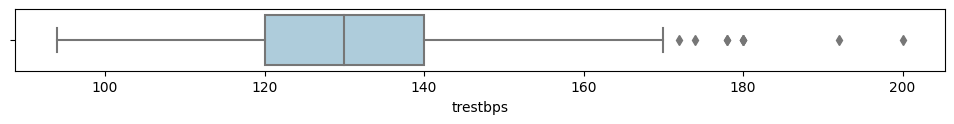

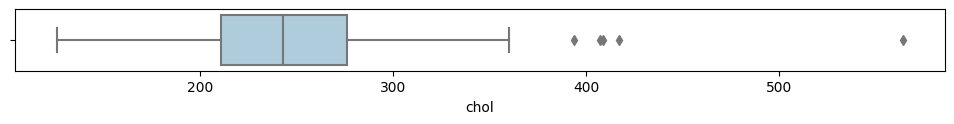

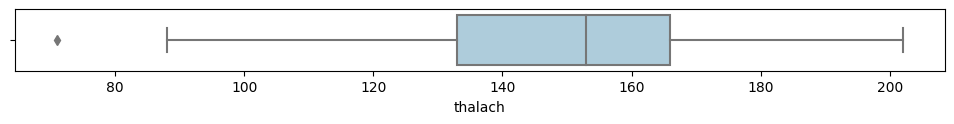

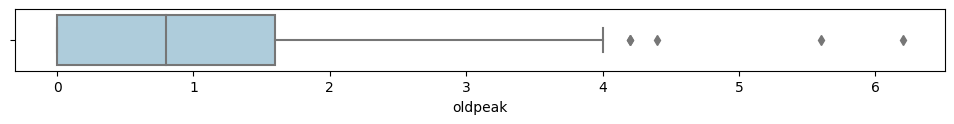

In [62]:
for col in df.columns:
    if col in cat or col == 'condition':
        continue
    plt.figure(figsize=(12,0.8))
    sns.boxplot(data=df, x=col, palette="Paired")

We can see some possible outliers, but!
Nothing will be done with them by me. It's odd that I'll be cleaning something like this despite not understanding how biological data work.

## Male vs Female

In [29]:
df.groupby(["sex", "condition"]).count()

age   cp  trestbps  chol  fbs  restecg  thalach  exang  \
sex condition                                                           
0   0           71   71        71    71   71       71       71     71   
    1           25   25        25    25   25       25       25     25   
1   0           89   89        89    89   89       89       89     89   
    1          112  112       112   112  112      112      112    112   

               oldpeak  slope   ca  thal  
sex condition                             
0   0               71     71   71    71  
    1               25     25   25    25  
1   0               89     89   89    89  
    1              112    112  112   112

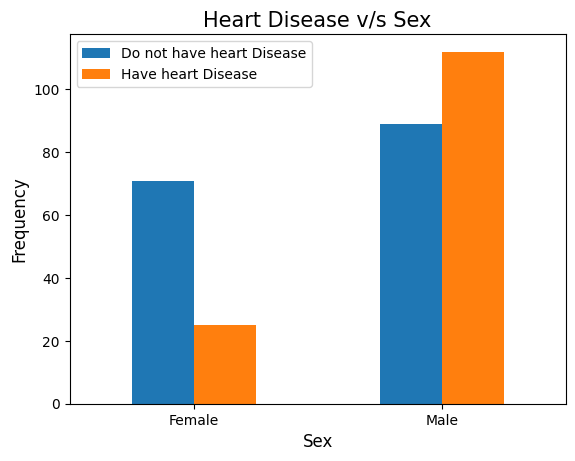

In [35]:
pd.crosstab(df.sex, df.condition).plot(kind="bar")
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Female","Male"])
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

Let's compare num of heart diseases depends on sex and age.

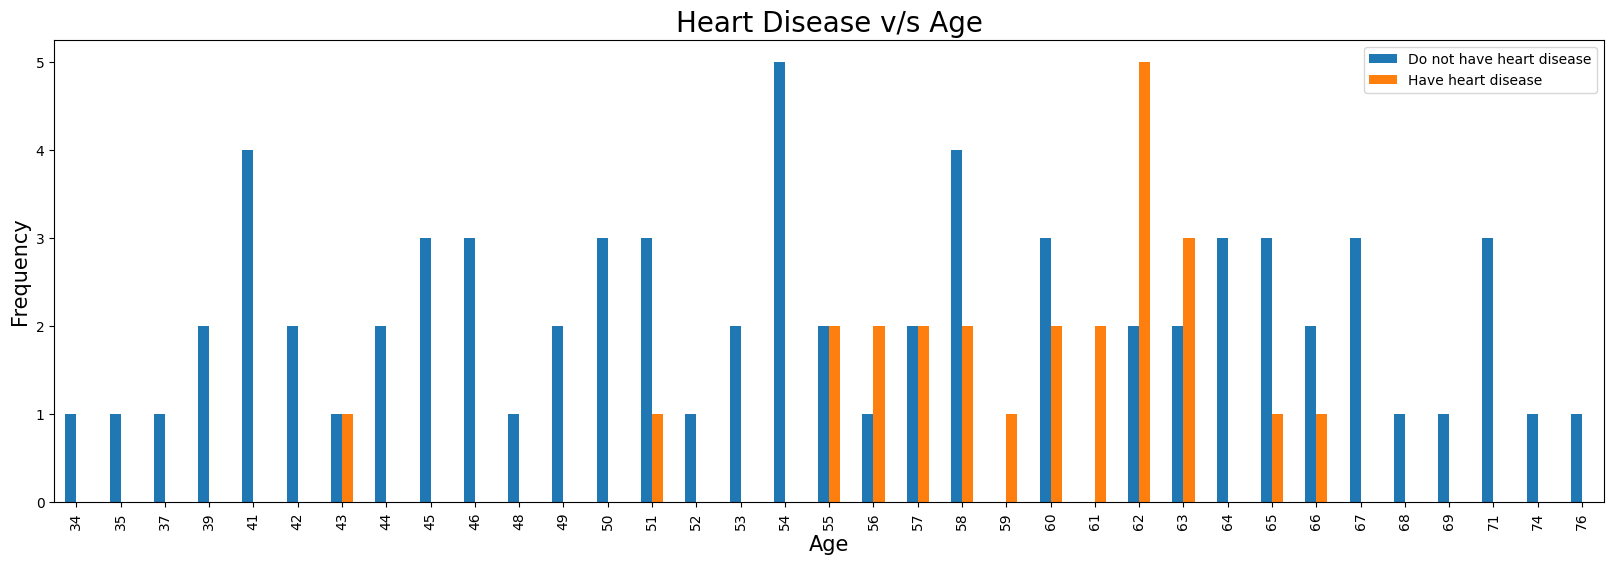

In [39]:
pd.crosstab(df[df.sex == 0].age, df[df.sex == 0].condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

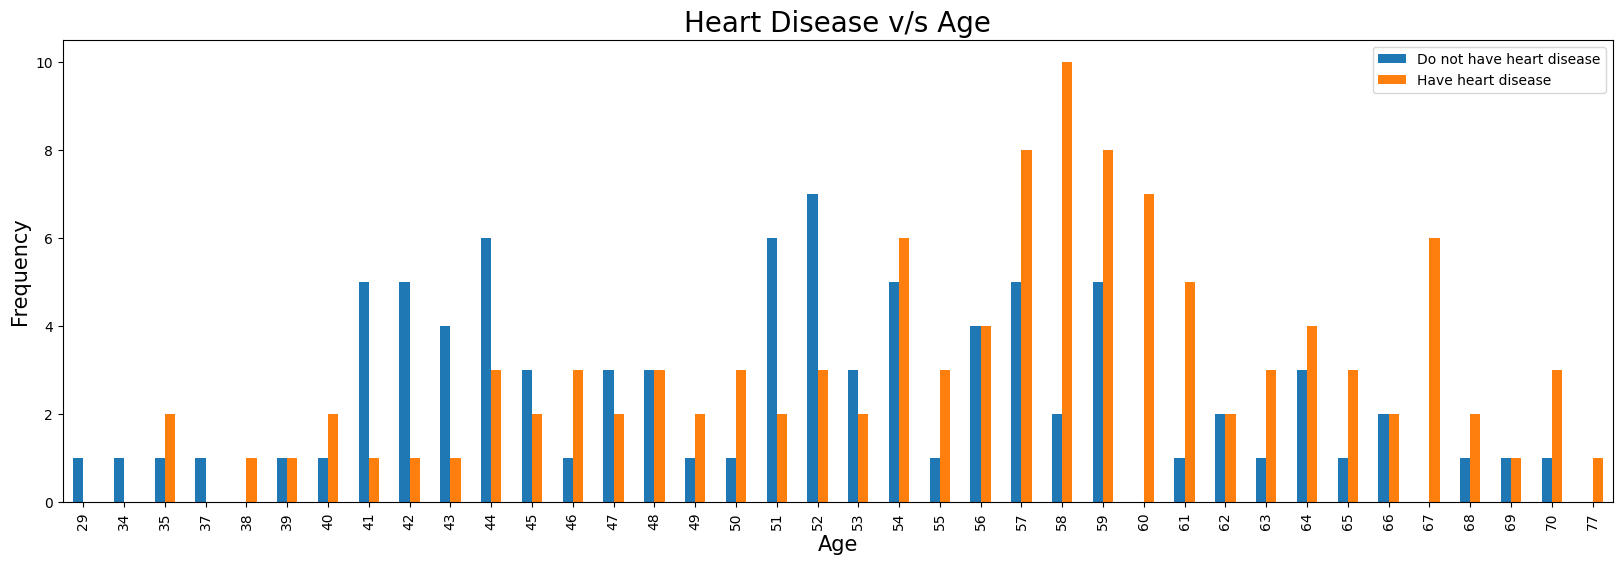

In [37]:
pd.crosstab(df[df.sex == 1].age, df[df.sex == 1].condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

Age is more important than sex.

## Cat

In [63]:
def ctg_dist1(df, cols,rows, columns):
    """A function for displaying cateorical distribution."""
    fig, axes = plt.subplots(rows, columns, figsize=(20, 15))
    axes = axes.flatten()

    for col, axe in zip(df[cols].columns, axes):
        sns.countplot(x=col,
            data=df,
            ax=axe,
            order=df[col].value_counts().index,
            hue='condition'
        )
        axe.tick_params(labelrotation=10)
        axe.set_title(f'{str(col).capitalize()} Distribution')
        total = float(len(df[col]))        
        for p in axe.patches:
            height = p.get_height()
            axe.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        plt.tight_layout()

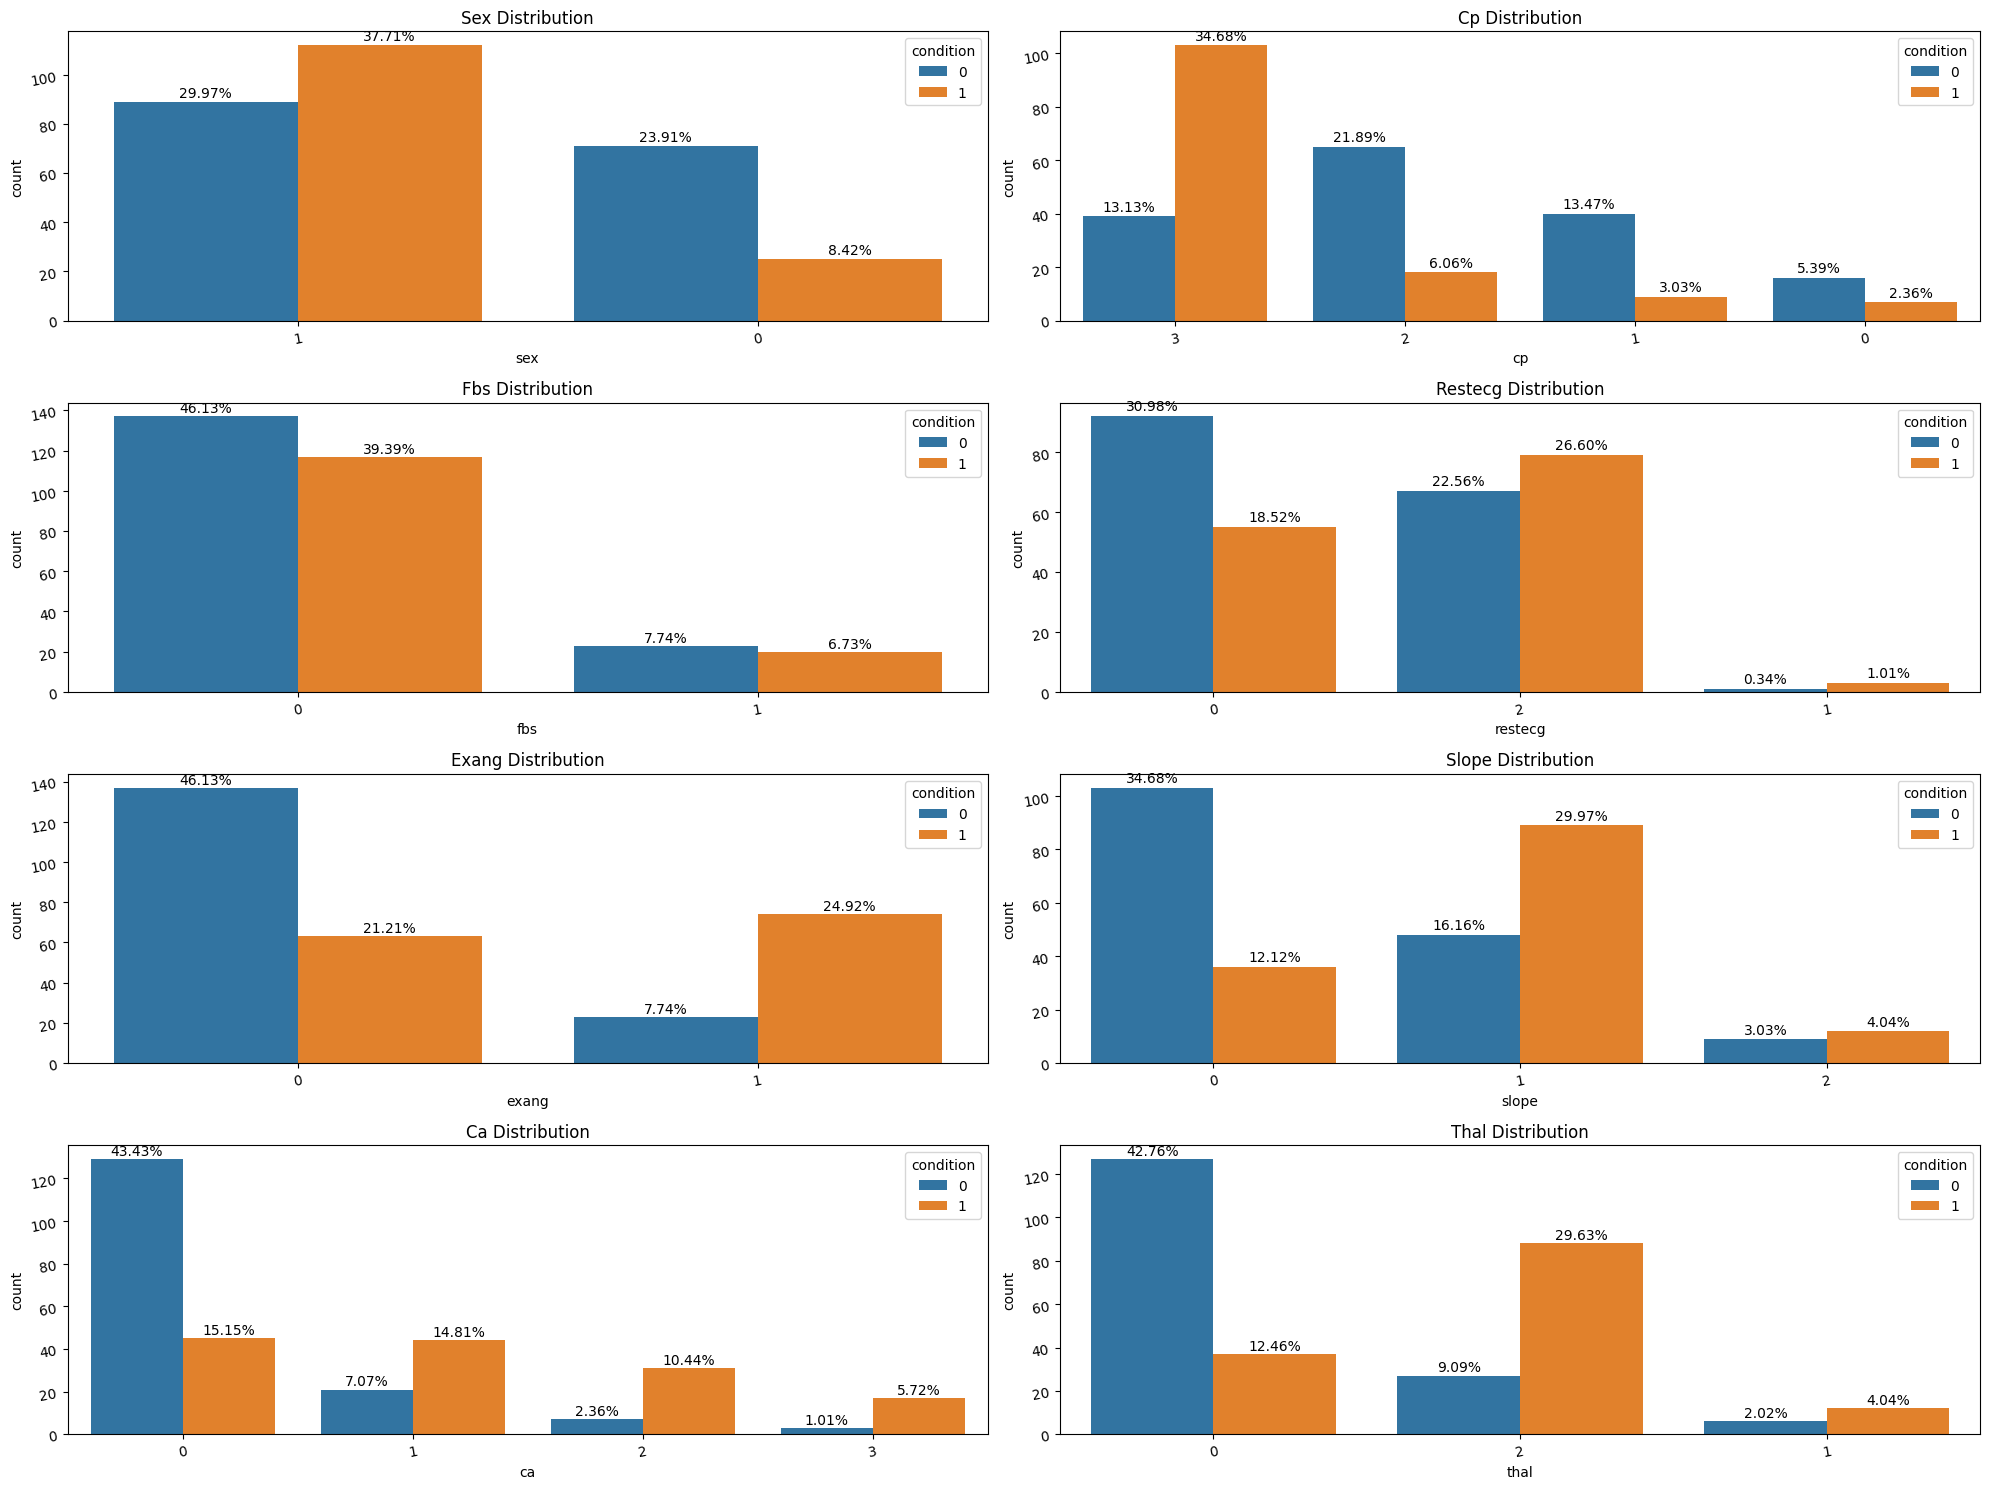

In [64]:
ctg_dist1(df, cat, 4, 2)

- asymptomatic chest pains having highest disease outcome;
- flat slope distribution are more likely to have disease;
- having normal ECG is better;
- having exercise induced angina is pretty strong indicator for heart disease.

## Num

<Figure size 800x500 with 0 Axes>

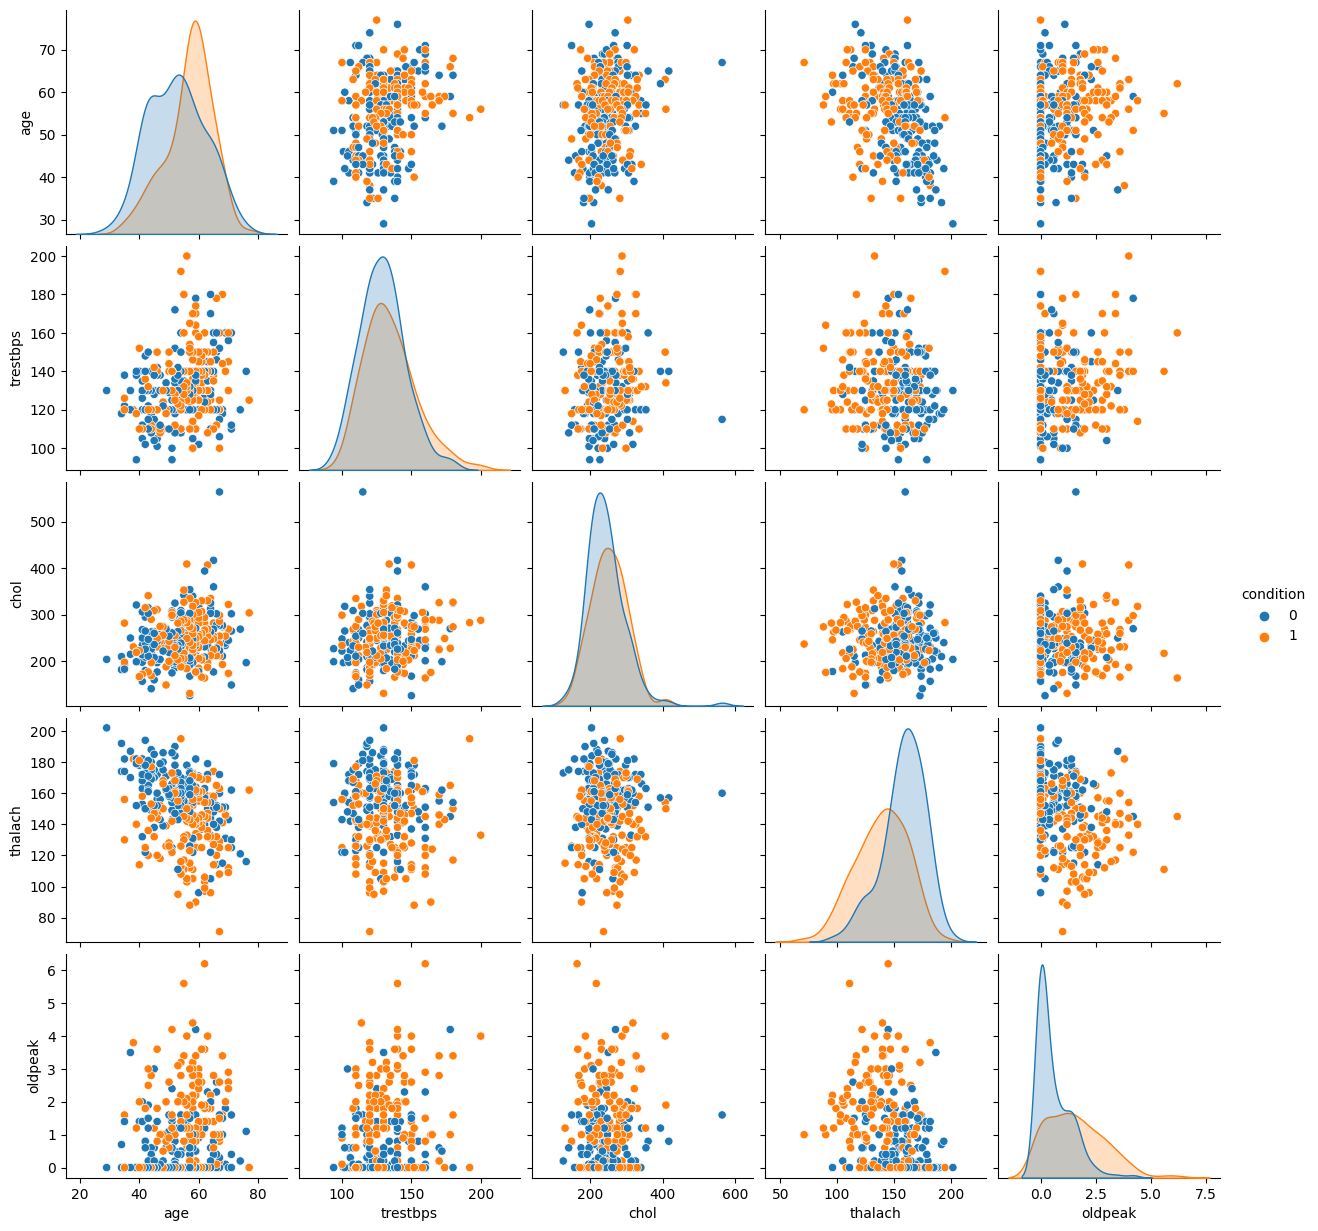

In [67]:
numeric_and_target = [col for col in df.columns if col not in cat]

plt.figure(figsize=(8, 5))
sns.pairplot(df[numeric_and_target], hue='condition')

plt.show()

- disease likelihood increases with ST depression levels;
- bigger max heart rate achived => smaller prob. of disease;
- getting old sucks.

# Data prep

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from ml_project.features.transformers import CatTransformer, ScalerTransformer


In [7]:
cat_trans = CatTransformer(max_cat_num=5)
scale_trans = ScalerTransformer(MinMaxScaler(), 5)

trans_pipe = Pipeline(
    [
        ("Cat", CatTransformer(max_cat_num=5)),
        ("Scale", ScalerTransformer(MinMaxScaler(), 5))
    ]
)

feats, target = df.drop("condition", axis=1), df.condition
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.3, random_state=42)


2022-11-03 00:25:42,318	INFO	[logger: ml_project.features.transformers]: Feature is categorical if number of unique vals is 5.
2022-11-03 00:25:42,340	INFO	[logger: ml_project.features.transformers]: Feature is categorical if number of unique vals is 5.


In [8]:
X_tr_train = trans_pipe.fit_transform(X_train)
X_tr_test = trans_pipe.transform(X_test)

In [24]:
def cv_best_train_report(estimator, param_grid, X_train, X_test, y_train, y_test, cv=5):
    clf = GridSearchCV(estimator, param_grid, cv=cv, scoring=["f1", "accuracy"], refit="f1")
    clf = clf.fit(X_train, y_train)
    print(classification_report(
        y_pred=clf.best_estimator_.predict(X_test), 
        y_true=y_test),
    )
    return clf.best_params_

# MODELS

# LogisticRegression

In [26]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

lr_best_params = cv_best_train_report(
    LogisticRegression(), 
    param_grid,
    X_train=X_tr_train,
    X_test=X_tr_test, 
    y_train=y_train, 
    y_test=y_test,
)

print(lr_best_params)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        48
           1       0.77      0.86      0.81        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90

{'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}


# RandomForest

In [28]:
param_grid = {
    'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5)),
    'criterion' : ["gini", "entropy", "log_loss"],
}

rf_best_params = cv_best_train_report(
    RandomForestClassifier(), 
    param_grid,
    X_train=X_train,
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test,
)

print(rf_best_params)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.79      0.81      0.80        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

{'criterion': 'log_loss', 'max_features': 6, 'n_estimators': 70}


# GradientBoostingClassifier

In [30]:
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators": list(range(50,101,10)),
}

gb_best_params = cv_best_train_report(
    GradientBoostingClassifier(), 
    param_grid,
    X_train=X_train,
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test,
)

print(gb_best_params)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.84      0.76      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 70}


/home/theo/mlops/mlops_LisinFedor/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theo/mlops/mlops_LisinFedor/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theo/mlops/mlops_LisinFedor/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 533, in fit
    raise ValueError(
ValueError: criterion='mae' is not supported. Use criterion='friedman_mse' or 'squared_error' instead, as trees should